## Problem

The risk manager has collected data on the loan borrowers. The data is in tabular format, with each row providing details of the borrower, including their income, total loans outstanding, and a few other metrics. There is also a column indicating if the borrower has previously defaulted on a loan. You must use this data to build a model that, given details for any loan described above, will predict the probability that the borrower will default (also known as PD: the probability of default). Use the provided data to train a function that will estimate the probability of default for a borrower. Assuming a recovery rate of 10%, this can be used to give the expected loss on a loan.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Task 3 and 4_Loan_Data.csv")
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [3]:
df["default"].value_counts()

0    8149
1    1851
Name: default, dtype: int64

There is a class imbalance with around 82% of customers not having defaulted and 18% having defaulted.

In [4]:
df[df["default"] == 1]

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
1,7442532,5,1958.928726,8228.75252,26648.43525,2,572,1
7,4616950,4,3302.172238,13067.57021,50352.16821,3,545,1
10,1946105,5,4224.542337,18858.28272,76975.03318,7,640,1
18,4522930,5,2761.049506,16620.80342,52428.52206,4,627,1
21,1467134,4,2608.798997,11177.43742,39682.19883,1,480,1
...,...,...,...,...,...,...,...,...
9951,2078988,5,4940.924258,19623.94953,72378.73862,2,552,1
9960,2118579,5,5122.908631,20777.11341,76232.83668,3,599,1
9973,6990844,5,3135.006926,17054.77273,59367.84811,5,707,1
9974,5183374,5,3691.123065,17106.07811,64632.03187,3,469,1


In [5]:
df[df["default"] == 1].describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.851000e+03,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.0
mean,5.007914e+06,4.618044,4454.854897,19270.582961,70726.740140,3.617504,596.257699,1.0
std,2.278015e+06,0.637969,1471.586769,6298.378378,20363.512385,1.401002,58.949929,0.0
min,1.000324e+06,2.000000,189.725024,592.445977,2836.241899,0.000000,409.000000,1.0
25%,3.016468e+06,4.000000,3395.163895,14740.001390,56538.397480,3.000000,557.000000,1.0
50%,5.116813e+06,5.000000,4393.697084,18915.578460,71266.967920,4.000000,597.000000,1.0
75%,6.972913e+06,5.000000,5388.006613,23221.702350,83938.486575,5.000000,636.500000,1.0
max,8.989969e+06,5.000000,10210.746690,43688.784100,133913.382300,8.000000,810.000000,1.0


In [6]:
df[df["default"] == 0].describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,8.149000e+03,8149.00000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.0
mean,4.967005e+06,0.74414,4092.629025,6322.164549,69883.889804,4.765247,646.938765,0.0
std,2.297552e+06,0.92804,1401.202322,3721.779885,20003.433022,1.524224,57.015049,0.0
min,1.000522e+06,0.00000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.0
25%,2.972996e+06,0.00000,3106.819120,3698.908070,56541.962600,4.000000,609.000000,0.0
50%,4.954762e+06,0.00000,3974.534449,5741.322203,69871.160160,5.000000,647.000000,0.0
75%,6.963636e+06,1.00000,4967.010407,8328.364985,83324.372830,6.000000,685.000000,0.0
max,8.999789e+06,5.00000,10750.677810,25792.807150,148412.180500,10.000000,850.000000,0.0


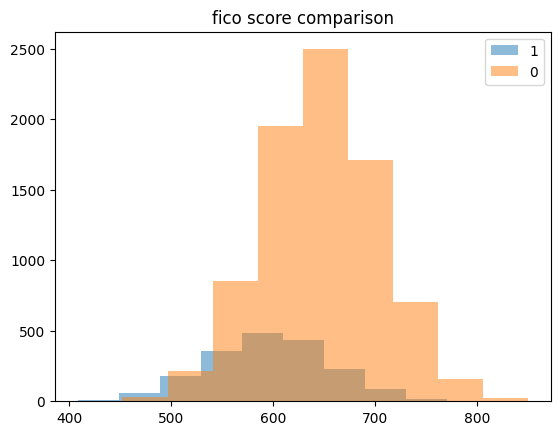

In [7]:
plt.hist(df[df["default"] == 1]["fico_score"], alpha=0.5, label="1")
plt.hist(df[df["default"] == 0]["fico_score"], alpha=0.5, label="0")
plt.legend()
plt.title("fico score comparison")
plt.show()

Borrowers with a low credit score are more likely to have defaulted.

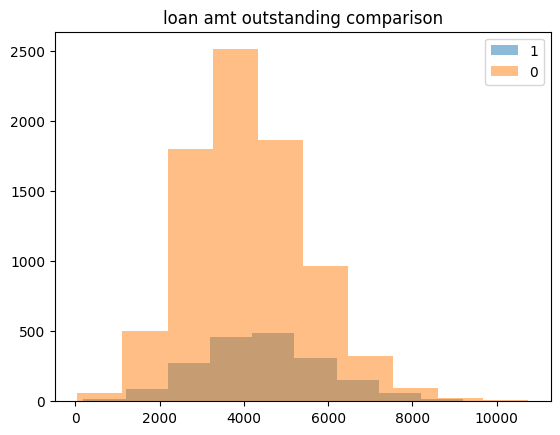

In [8]:
plt.hist(df[df["default"] == 1]["loan_amt_outstanding"], alpha=0.5, label="1")
plt.hist(df[df["default"] == 0]["loan_amt_outstanding"], alpha=0.5, label="0")
plt.legend()
plt.title("loan amt outstanding comparison")
plt.show()

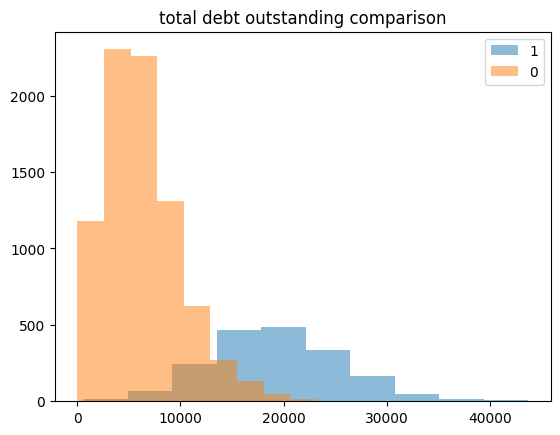

In [9]:
plt.hist(df[df["default"] == 1]["total_debt_outstanding"], alpha=0.5, label="1")
plt.hist(df[df["default"] == 0]["total_debt_outstanding"], alpha=0.5, label="0")
plt.legend()
plt.title("total debt outstanding comparison")
plt.show()

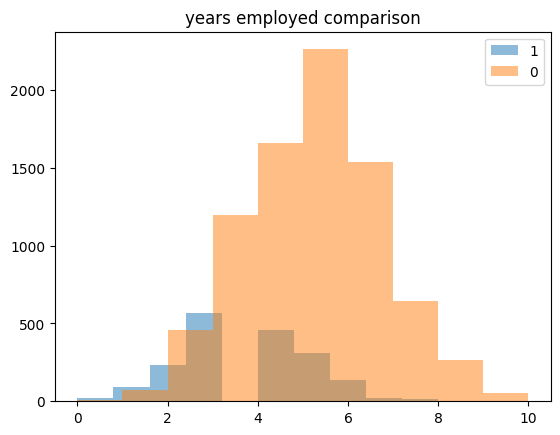

In [10]:
plt.hist(df[df["default"] == 1]["years_employed"], alpha=0.5, label="1")
plt.hist(df[df["default"] == 0]["years_employed"], alpha=0.5, label="0")
plt.legend()
plt.title("years employed comparison")
plt.show()

In [11]:
df["debt_loan_income_ratio"] = (df["loan_amt_outstanding"] + df["total_debt_outstanding"]) / df["income"]
df["debt_income_ratio"] = df["total_debt_outstanding"] / df["income"]
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,debt_loan_income_ratio,debt_income_ratio
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,0.117082,0.050173
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,0.382299,0.308789
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,0.081845,0.030787
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,0.097750,0.033645
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,0.132831,0.075435
...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,0.130878,0.059818
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,0.120101,0.068253
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,0.206880,0.126021
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,0.085059,0.020481


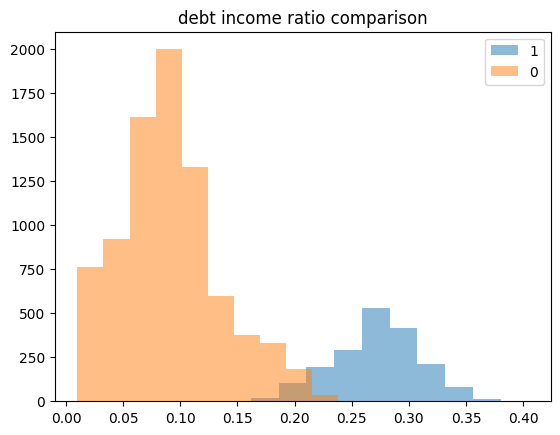

In [12]:
plt.hist(df[df["default"] == 1]["debt_income_ratio"], alpha=0.5, label="1")
plt.hist(df[df["default"] == 0]["debt_income_ratio"], alpha=0.5, label="0")
plt.legend()
plt.title("debt income ratio comparison")
plt.show()

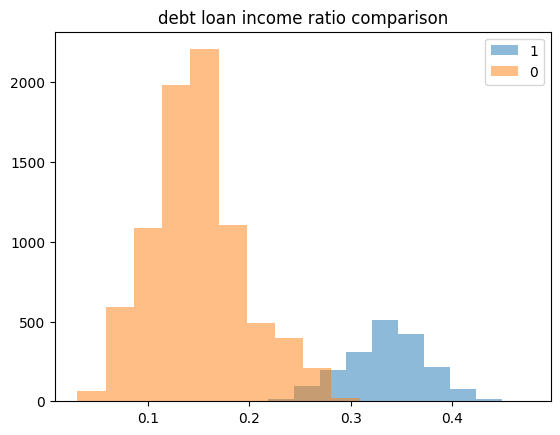

In [13]:
plt.hist(df[df["default"] == 1]["debt_loan_income_ratio"], alpha=0.5, label="1")
plt.hist(df[df["default"] == 0]["debt_loan_income_ratio"], alpha=0.5, label="0")
plt.legend()
plt.title("debt loan income ratio comparison")
plt.show()

There is a clear separation of borrowers who have defaulted in the past based on their current total outstanding debt. Borrowers with total debt outstanding greater than 25,000 have all defaulted.
I also performed feature engineering to get 2 new features: the debt-income ratio and the debt-loan-income ratio. The rationale is that the customer's ability to repay their debt is not only dependent on how much they owe, but also how much money they earn. Thus, I expect that those with a high debt to income ratio to be more likely to default, which is the case as we can see from the histogram.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

Use whether the borrower had previously defaulted as a proxy for determining the probability that they will default again.
I will use 80% of the provided data as the training set and the remaining 20% as the test (validation) set to determine how well the model performs.


In [15]:
df = pd.read_csv("Task 3 and 4_Loan_Data.csv")
PRED_COLUMN = "default"
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
X_train = train_df.drop(columns=[PRED_COLUMN])
y_train = train_df[PRED_COLUMN]
X_test = test_df.drop(columns=[PRED_COLUMN])
y_test = test_df[PRED_COLUMN]

In [16]:
X_train

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score
0,1405900,0,3005.328746,4216.415038,62959.18911,5,712
1,1329701,1,4717.704748,8760.954045,63546.22748,3,700
2,1592653,0,5394.537878,5024.768703,81083.45762,6,704
3,6904116,1,5367.416056,8101.373570,78087.37726,4,709
4,4838409,1,3622.450370,7329.325832,68499.74591,5,693
...,...,...,...,...,...,...,...
7995,6657635,0,5156.223930,5498.313957,78189.16432,3,632
7996,7205591,0,4176.678136,2875.619535,49886.56723,3,641
7997,5773869,0,4105.612488,6572.384556,81302.87422,3,576
7998,5650696,3,4899.443593,17795.917300,81136.36579,2,554


In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        # Fit the transformer to the data (e.g. compute any necessary statistics)
        return self
    
    def transform(self, X):
        # Create the custom features
        X_transformed = X.copy()
        X_transformed["debt_loan_income_ratio"] = (X_transformed["total_debt_outstanding"] + X_transformed["loan_amt_outstanding"]) / X_transformed["income"]
        X_transformed["debt_income_ratio"] = X_transformed["total_debt_outstanding"] / X_transformed["income"]
        
        return X_transformed

In [18]:
drop_columns = ["customer_id"]
feature_engineered_columns = ["debt_loan_income_ratio", "debt_income_ratio"]
numeric_columns = [col for col in X_train.columns if col not in drop_columns] + feature_engineered_columns
preprocessing_pipeline = Pipeline(steps=[
    ('feature_engineering', CustomFeatureTransformer()),  # Create new features
    ('column_transformer', ColumnTransformer(
        transformers=[
            ('num_scaling', StandardScaler(), numeric_columns),  # Scale numerical features including the new one
        ]
    ))
])
preprocessing_pipeline

Pipeline(steps=[('feature_engineering', CustomFeatureTransformer()),
                ('column_transformer',
                 ColumnTransformer(transformers=[('num_scaling',
                                                  StandardScaler(),
                                                  ['credit_lines_outstanding',
                                                   'loan_amt_outstanding',
                                                   'total_debt_outstanding',
                                                   'income', 'years_employed',
                                                   'fico_score',
                                                   'debt_loan_income_ratio',
                                                   'debt_income_ratio'])]))])

In [19]:
lr_pipe = make_pipeline(
    preprocessing_pipeline,
    LogisticRegression(class_weight="balanced", solver="liblinear")
)
lr_pipe

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('feature_engineering',
                                  CustomFeatureTransformer()),
                                 ('column_transformer',
                                  ColumnTransformer(transformers=[('num_scaling',
                                                                   StandardScaler(),
                                                                   ['credit_lines_outstanding',
                                                                    'loan_amt_outstanding',
                                                                    'total_debt_outstanding',
                                                                    'income',
                                                                    'years_employed',
                                                                    'fico_score',
                                                                    'debt_loan_income_ratio',
      

In [20]:
lr_param_grid = {
    "logisticregression__penalty": ["l1", "l2"],
    "logisticregression__C": [100, 10, 1.0, 0.1, 0.01]
}
lr_grid_search = GridSearchCV(estimator=lr_pipe, param_grid=lr_param_grid, n_jobs=-1, cv=5, return_train_score=True)
lr_grid_search.fit(X_train, y_train)
lr_model = lr_grid_search.best_estimator_
lr_model

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('feature_engineering',
                                  CustomFeatureTransformer()),
                                 ('column_transformer',
                                  ColumnTransformer(transformers=[('num_scaling',
                                                                   StandardScaler(),
                                                                   ['credit_lines_outstanding',
                                                                    'loan_amt_outstanding',
                                                                    'total_debt_outstanding',
                                                                    'income',
                                                                    'years_employed',
                                                                    'fico_score',
                                                                    'debt_loan_income_ratio',
      

Perform hyperparameter tuning, testing out different losses and different regularization strengths.

In [21]:
pd.DataFrame(lr_grid_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.673946,0.053701,0.015124,0.002236,100,l1,"{'logisticregression__C': 100, 'logisticregres...",0.999375,0.998750,0.998750,...,0.999250,0.000468,1,0.999844,0.999375,0.999687,0.999375,0.999531,0.999563,0.000182
2,0.439070,0.057901,0.016530,0.004083,10,l1,"{'logisticregression__C': 10, 'logisticregress...",0.998125,0.998750,0.998125,...,0.998750,0.000559,2,0.999375,0.998594,0.999219,0.998906,0.998906,0.999000,0.000272
1,0.099974,0.008823,0.020409,0.002494,100,l2,"{'logisticregression__C': 100, 'logisticregres...",0.998125,0.996875,0.998125,...,0.998125,0.000685,3,0.998750,0.998281,0.998906,0.998594,0.998125,0.998531,0.000290
4,0.170574,0.010949,0.014322,0.002820,1.0,l1,"{'logisticregression__C': 1.0, 'logisticregres...",0.998125,0.996250,0.996250,...,0.997125,0.000750,4,0.996719,0.996875,0.997500,0.996406,0.996406,0.996781,0.000403
3,0.075572,0.010950,0.017128,0.002204,10,l2,"{'logisticregression__C': 10, 'logisticregress...",0.996875,0.993750,0.995000,...,0.995625,0.001369,5,0.995938,0.995938,0.996406,0.995781,0.995469,0.995906,0.000303
5,0.048123,0.015729,0.012803,0.002139,1.0,l2,"{'logisticregression__C': 1.0, 'logisticregres...",0.991250,0.986875,0.990000,...,0.990000,0.001896,6,0.989531,0.990938,0.989844,0.990156,0.989688,0.990031,0.000498
6,0.065188,0.016318,0.015197,0.002923,0.1,l1,"{'logisticregression__C': 0.1, 'logisticregres...",0.988125,0.981875,0.990000,...,0.987000,0.002721,7,0.987344,0.987344,0.986875,0.986563,0.985625,0.986750,0.000636
7,0.037712,0.005167,0.018196,0.008424,0.1,l2,"{'logisticregression__C': 0.1, 'logisticregres...",0.970000,0.969375,0.975625,...,0.973250,0.003021,8,0.974219,0.974063,0.972969,0.973281,0.973125,0.973531,0.000510
8,0.055745,0.004800,0.012418,0.001137,0.01,l1,"{'logisticregression__C': 0.01, 'logisticregre...",0.959375,0.952500,0.958125,...,0.957000,0.002481,9,0.957344,0.957969,0.957500,0.957500,0.956406,0.957344,0.000513
9,0.034356,0.004590,0.009801,0.001715,0.01,l2,"{'logisticregression__C': 0.01, 'logisticregre...",0.946875,0.936875,0.945000,...,0.944625,0.004341,10,0.944844,0.946250,0.944844,0.946250,0.943750,0.945187,0.000955


In [22]:
lr_model.score(X_test, y_test)

0.9995

The model has nearly 100% accuracy in predicting whether a customer will default or not.

In [23]:
test_df["default_probability"] = lr_model.predict_proba(X_test)[:, 1]
test_df

C:\Users\ROG ZEPHYRUS\AppData\Local\Temp\ipykernel_812\1798719724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["default_probability"] = lr_model.predict_proba(X_test)[:, 1]


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,default_probability
0,4625643,2,3584.844437,7708.784716,72005.83951,8,593,0,1.631277e-52
1,3793909,3,5821.006507,16345.025390,80431.47019,6,634,0,5.195974e-14
2,3816784,5,5343.193215,30614.603030,86303.95374,4,607,1,1.000000e+00
3,2396492,0,1468.268561,1369.352513,28621.64224,5,621,0,3.535812e-74
4,5522422,1,3519.975193,9027.320474,69844.46479,6,650,0,6.637211e-56
...,...,...,...,...,...,...,...,...,...
1995,1702974,1,7202.353227,10821.920370,101898.87450,5,661,0,3.092444e-53
1996,6369679,0,6863.007842,5147.907002,88837.64850,4,585,0,2.839805e-64
1997,3766104,2,4038.730317,9726.843194,75006.40180,4,653,0,1.212573e-29
1998,4753341,1,1118.592485,2154.883645,20118.35008,6,789,0,1.884803e-66


In [24]:
test_df[pd.Series(lr_model.predict(X_test)) != y_test.reset_index(drop=True)]

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,default_probability
1770,2556162,3,2796.437424,15419.40875,74768.70412,5,484,1,0.313789


In [25]:
lr_model

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('feature_engineering',
                                  CustomFeatureTransformer()),
                                 ('column_transformer',
                                  ColumnTransformer(transformers=[('num_scaling',
                                                                   StandardScaler(),
                                                                   ['credit_lines_outstanding',
                                                                    'loan_amt_outstanding',
                                                                    'total_debt_outstanding',
                                                                    'income',
                                                                    'years_employed',
                                                                    'fico_score',
                                                                    'debt_loan_income_ratio',
      

Finally, we train the Logistic Regression model using the entire dataset.

In [26]:
X = df.drop(columns=["default"])
y = df["default"]
drop_columns = ["customer_id"]
feature_engineered_columns = ["debt_loan_income_ratio", "debt_income_ratio"]
numeric_columns = [col for col in X_train.columns if col not in drop_columns] + feature_engineered_columns
preprocessing_pipeline = Pipeline(steps=[
    ('feature_engineering', CustomFeatureTransformer()),  # Create new features
    ('column_transformer', ColumnTransformer(
        transformers=[
            ('num_scaling', StandardScaler(), numeric_columns),  # Scale numerical features including the new one
        ]
    ))
])
final_lr_model = make_pipeline(
    preprocessing_pipeline,
    LogisticRegression(C=100, class_weight="balanced", penalty="l1", solver="liblinear")
)
final_lr_model.fit(X, y)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('feature_engineering',
                                  CustomFeatureTransformer()),
                                 ('column_transformer',
                                  ColumnTransformer(transformers=[('num_scaling',
                                                                   StandardScaler(),
                                                                   ['credit_lines_outstanding',
                                                                    'loan_amt_outstanding',
                                                                    'total_debt_outstanding',
                                                                    'income',
                                                                    'years_employed',
                                                                    'fico_score',
                                                                    'debt_loan_income_ratio',
      

Finally, we create a function to calculate the expected loss. The expected loss should be very close to 0 if the probability of the customer defaulting is low. In contrast, the higher the probability of the customer defaulting, the closer the expected loss is to their remaining debt.

In [27]:
# Expected loss = P(default) * (1 - recovery rate) * Exposure at default (i.e. debt remaining)
def get_default_probability(model, loan_properties):
    return model.predict_proba(loan_properties)[:, 1][0]

def calculate_expected_loss(loan_properties, model=final_lr_model, recovery_rate=0.1):
    default_probability = get_default_probability(model, loan_properties)
    exposure_at_default = loan_properties["total_debt_outstanding"].values[0]
    return default_probability * (1 - recovery_rate) * exposure_at_default

In [28]:
sample_no_default = X.iloc[[0]]
sample_no_default

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605


In [29]:
calculate_expected_loss(sample_no_default)

1.1729833089902354e-79

In [30]:
sample_default = X.iloc[[1]]
sample_default

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score
1,7442532,5,1958.928726,8228.75252,26648.43525,2,572


In [31]:
calculate_expected_loss(sample_default)

7405.877268